In [38]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
# loading data

df = pd.read_csv('Customer_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# checking statistical information such as size , shape , describe , info

In [30]:
df.shape

(2240, 29)

In [29]:
df.size

64960

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [32]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [33]:
# checking null values
df.isnull().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [3]:
# treatment on null values ( using mean method)
df1 = df.fillna(df['Income'].mean())
df1.shape

(2240, 29)

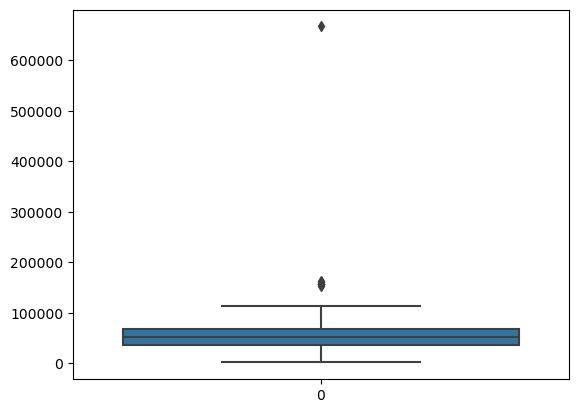

In [39]:
# boxplot (to identify outliers)

sns.boxplot(df1['Income'])
plt.show()

In [41]:
# IQR

Q1 = np.percentile(df1['Income'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df1['Income'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df1.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df1['Income']>=upper)
# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['Income']<=lower)
print(upper,lower)
df1=df1[df1["Income"]<upper]

Old Shape:  (2240, 30)
117446.0 -13614.0


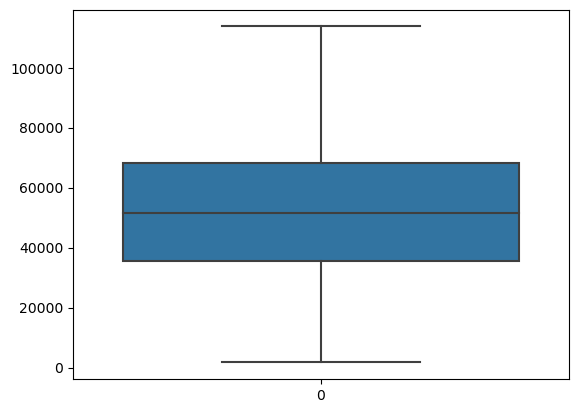

In [42]:
sns.boxplot(df1['Income'])
plt.show()

In [44]:
df1.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
cluster                0
dtype: int64

In [45]:
X = df1.iloc[:,[4,9,10,11,12,13,14]].values
X.shape

(2232, 7)

In [46]:
X[:29]

array([[5.81380000e+04, 6.35000000e+02, 8.80000000e+01, 5.46000000e+02,
        1.72000000e+02, 8.80000000e+01, 8.80000000e+01],
       [4.63440000e+04, 1.10000000e+01, 1.00000000e+00, 6.00000000e+00,
        2.00000000e+00, 1.00000000e+00, 6.00000000e+00],
       [7.16130000e+04, 4.26000000e+02, 4.90000000e+01, 1.27000000e+02,
        1.11000000e+02, 2.10000000e+01, 4.20000000e+01],
       [2.66460000e+04, 1.10000000e+01, 4.00000000e+00, 2.00000000e+01,
        1.00000000e+01, 3.00000000e+00, 5.00000000e+00],
       [5.82930000e+04, 1.73000000e+02, 4.30000000e+01, 1.18000000e+02,
        4.60000000e+01, 2.70000000e+01, 1.50000000e+01],
       [6.25130000e+04, 5.20000000e+02, 4.20000000e+01, 9.80000000e+01,
        0.00000000e+00, 4.20000000e+01, 1.40000000e+01],
       [5.56350000e+04, 2.35000000e+02, 6.50000000e+01, 1.64000000e+02,
        5.00000000e+01, 4.90000000e+01, 2.70000000e+01],
       [3.34540000e+04, 7.60000000e+01, 1.00000000e+01, 5.60000000e+01,
        3.00000000e+00, 1

In [47]:
# elbow method
clustering_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init = 'random',random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_)

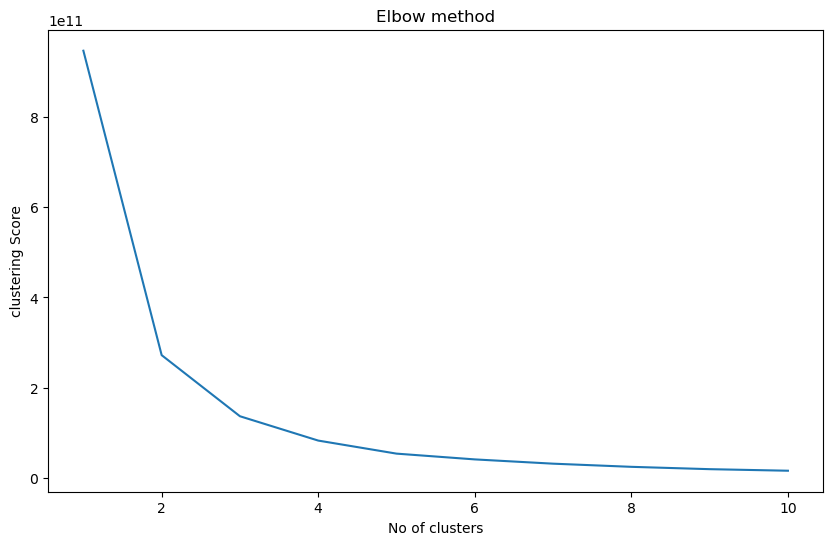

In [48]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11),clustering_score)
plt.xlabel('No of clusters')
plt.ylabel('clustering Score')
plt.title("Elbow method")
plt.show()

In [49]:
clustering_score

[947289518757.5513,
 271968811527.10107,
 136445062616.65407,
 82469519036.62747,
 53517194054.95243,
 40712224759.55031,
 31236411853.73097,
 24231666623.119774,
 19042140197.321877,
 15600411275.024714]

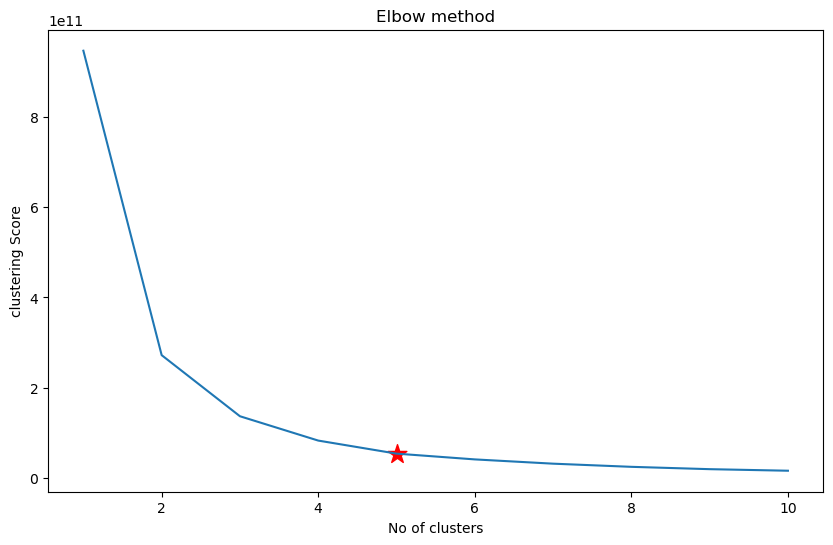

In [50]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), clustering_score)
plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker = "*")
plt.xlabel('No of clusters')
plt.ylabel('clustering Score')

plt.title("Elbow method")

plt.show()

In [51]:
# silhoutte score : used to determine degree of speration between clusters
# coeff range is in [-1,1]
# if it is 0 : sample is very much closer to neighbouring cluster
# if it is 1 : sample is away from neighbouring cluster
# if it is -1 : sample is assigned to wrong cluster

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score_lst = []
for i in range(2,11):
    silhouette_score_lst.append(silhouette_score(X,(KMeans(n_clusters=i).fit_predict(X))))

In [53]:
silhouette_score_lst

[0.6021464916739305,
 0.5522741497886315,
 0.5343186026531762,
 0.5409893375510499,
 0.5197390131947478,
 0.5153550730826555,
 0.5184603187051008,
 0.5219711206978467,
 0.5181507853028396]

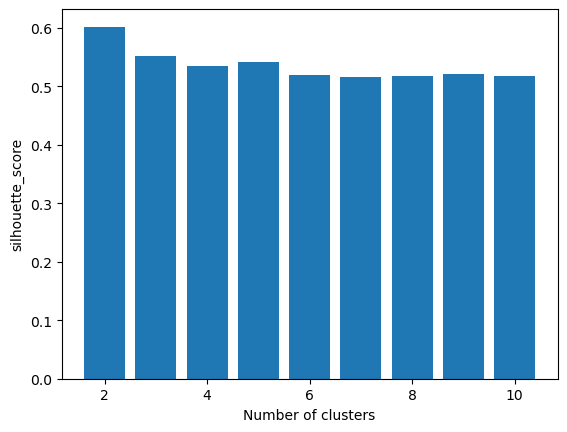

In [54]:
# plotting
k = [2,3,4,5,6,7,8,9,10]
plt.bar(k,silhouette_score_lst)
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_score")
plt.show()

In [55]:
# highest value of bar from given clusters values will be selected

In [56]:
# selecting number of clusters = 4

In [57]:
# set up a model
kmeans = KMeans(n_clusters=4,random_state = 42)
# fit model
kmeans.fit(X)
# predict
pred = kmeans.predict(X)
print(pred)

[0 3 2 ... 0 0 0]


In [58]:
len(pred)

2232

In [59]:
df1['cluster'] = pd.DataFrame(pred,columns = ['cluster'])
df1.head(10)

C:\Users\asus\AppData\Local\Temp\ipykernel_7428\2279948890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = pd.DataFrame(pred,columns = ['cluster'])


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,0,0,0,0,0,0,3,11,1,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,0,0,0,0,0,0,3,11,0,3.0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,0,0,0,0,0,0,3,11,0,2.0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,0,0,0,0,0,0,3,11,0,1.0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,0,0,0,0,0,0,3,11,0,0.0
5,7446,1967,Master,Together,62513.0,0,1,09/09/13,16,520,...,0,0,0,0,0,0,3,11,0,0.0
6,965,1971,Graduation,Divorced,55635.0,0,1,13/11/12,34,235,...,0,0,0,0,0,0,3,11,0,0.0
7,6177,1985,PhD,Married,33454.0,1,0,08/05/13,32,76,...,0,0,0,0,0,0,3,11,0,3.0
8,4855,1974,PhD,Together,30351.0,1,0,06/06/13,19,14,...,0,0,0,0,0,0,3,11,1,1.0
9,5899,1950,PhD,Together,5648.0,1,1,13/03/14,68,28,...,1,0,0,0,0,0,3,11,0,1.0


In [60]:
df1['cluster'].value_counts()

0.0    641
3.0    625
2.0    518
1.0    441
Name: cluster, dtype: int64

In [61]:
# centroids of each clusters
kmeans.cluster_centers_

array([[5.96566408e+04, 4.23055988e+02, 2.93110420e+01, 1.63119751e+02,
        3.93514774e+01, 2.82488336e+01, 5.75178849e+01],
       [2.30362551e+04, 1.64130926e+01, 5.53950339e+00, 2.09322799e+01,
        8.09255079e+00, 5.79909707e+00, 1.63476298e+01],
       [7.89918038e+04, 6.44494231e+02, 6.27596154e+01, 4.37223077e+02,
        9.04519231e+01, 6.70115385e+01, 7.39307692e+01],
       [4.09280958e+04, 1.05704473e+02, 7.89936102e+00, 4.38945687e+01,
        1.29392971e+01, 8.03833866e+00, 2.54137380e+01]])

In [62]:
kmeans.cluster_centers_[:,0]

array([59656.64079703, 23036.25507901, 78991.80384615, 40928.09584665])

In [63]:
X[pred==0,0]

array([58138.        , 58293.        , 62513.        , 55635.        ,
       52247.25135379, 63033.        , 59354.        , 58607.        ,
       65324.        , 53359.        , 52247.25135379, 68657.        ,
       67353.        , 52247.25135379, 52247.25135379, 65486.        ,
       66373.        , 52247.25135379, 55954.        , 66653.        ,
       61823.        , 67680.        , 69096.        , 66991.        ,
       52247.25135379, 65031.        , 60631.        , 56046.        ,
       50388.        , 54178.        , 52247.25135379, 52247.25135379,
       52247.25135379, 51813.        , 65846.        , 52413.        ,
       68126.        , 57288.        , 50785.        , 56129.        ,
       54348.        , 52247.25135379, 62998.        , 61331.        ,
       52247.25135379, 62981.        , 65104.        , 68352.        ,
       59809.        , 59354.        , 65747.        , 61010.        ,
       60199.        , 55375.        , 62551.        , 52332.        ,
      

In [64]:
X[pred==0,1]

array([ 635.,  173.,  520.,  235.,    5.,  194.,  233.,  867.,  384.,
        173.,    5.,  482.,  702.,   81.,   48.,  245.,  328.,   11.,
        447.,  452.,  523.,  546.,  247.,  496.,   25.,  258.,  565.,
        577.,  292.,  135.,  230.,    7.,  445.,   51.,  562.,  295.,
       1332.,  527.,   64.,  320.,   70.,  352.,  120.,  534.,  231.,
        796.,  738.,  614.,  598.,  295.,  346.,  888.,    8.,   42.,
        125.,  212.,  277.,   85.,   81.,   59.,  152.,  620.,  356.,
        466.,  235.,  448.,  587., 1170.,   12.,  897.,  297.,  787.,
        562.,    8.,  382.,  789.,  864.,  960.,  918.,  778.,  167.,
        625.,  216.,  635.,  297.,  204.,  285., 1241.,  395.,  801.,
        513.,  509.,  861.,  185.,   91.,  738.,  412.,  731.,  792.,
         33.,  909.,  317.,  456., 1103.,  378., 1048.,   78.,  561.,
        629.,  512.,  247.,  404.,  789.,  977., 1043.,  571.,  140.,
        102.,  919.,  416.,  155.,  370.,  407., 1200.,  378.,  515.,
         31.,  357.,

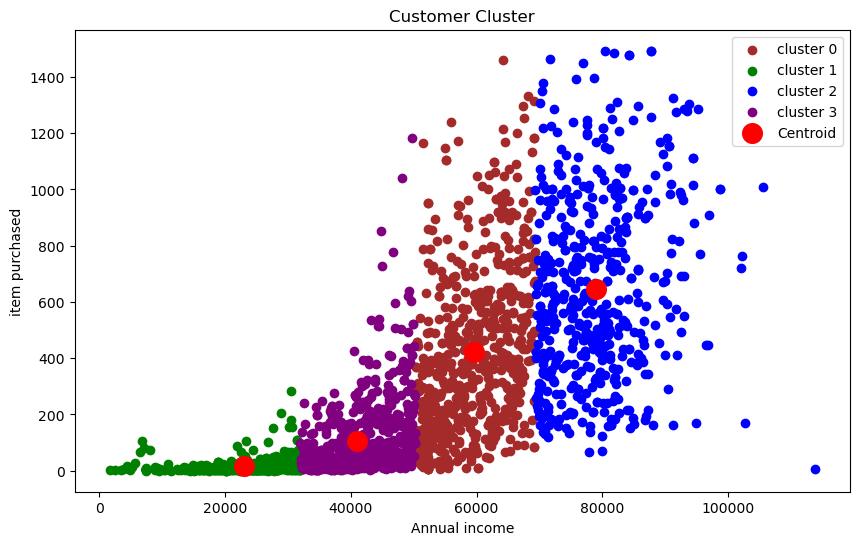

In [65]:
plt.figure(figsize = (10,6))

plt.scatter(X[pred==0,0],X[pred==0,1],c = 'brown',label = 'cluster 0')
plt.scatter(X[pred==1,0],X[pred==1,1],c = 'green',label = 'cluster 1')
plt.scatter(X[pred==2,0],X[pred==2,1],c = 'blue',label = 'cluster 2')
plt.scatter(X[pred==3,0],X[pred==3,1],c = 'purple',label = 'cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200, c = 'red',label = "Centroid")
plt.title("Customer Cluster")
plt.xlabel("Annual income")
plt.ylabel("item purchased")
plt.legend()
plt.show()
